## Importing Libraries and Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
gdata = pd.read_csv('googleplaystore (1).csv')
gdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Structure, Statistics, and Data Handling

In [3]:
gdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
gdata.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
gdata.shape

(10841, 13)

In [8]:
gdata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
missing_values = gdata.isnull().sum()
print("Missing values before cleaning:\n", missing_values)

Missing values before cleaning:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [104]:
gdata['Type'].value_counts()

Type
Free    10032
Paid      797
Name: count, dtype: int64

In [105]:
gdata['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [10]:
gdata['Rating'].fillna(gdata['Rating'].mean(), inplace=True)

In [11]:
gdata.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'], inplace=True)

In [12]:
gdata['Reviews'] = gdata['Reviews'].astype(int)
gdata['Installs'] = gdata['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
gdata['Price'] = gdata['Price'].str.replace('$', '').astype(float)

In [13]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '')) * 1024  # Convert MB to KB
    elif 'k' in size:
        return float(size.replace('k', ''))
    else:
        return np.nan

In [14]:
gdata['Size'] = gdata['Size'].apply(convert_size)

In [15]:
gdata.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Exploratory Data Analysis (EDA)

### 1. Rating Distribution

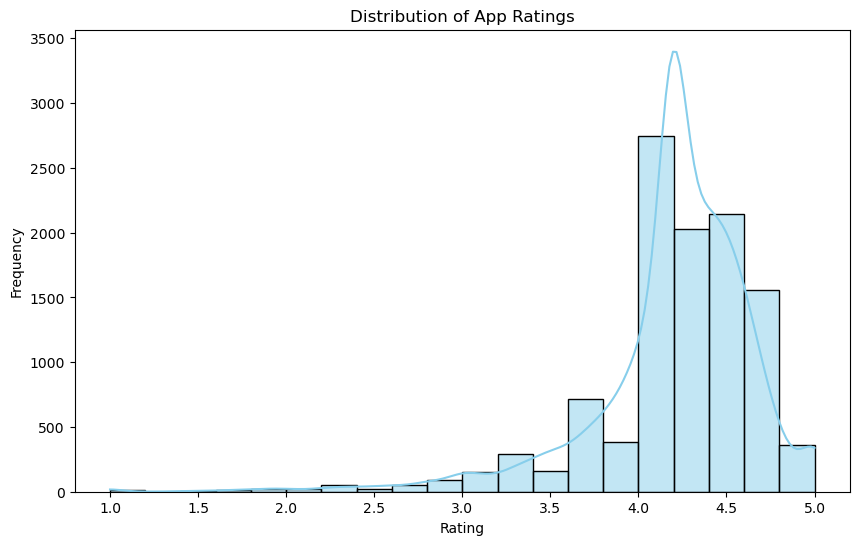

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(gdata['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### 2. Top 10 Categories by Number of Apps

In [18]:
top_categories = gdata['Category'].value_counts().head(10)

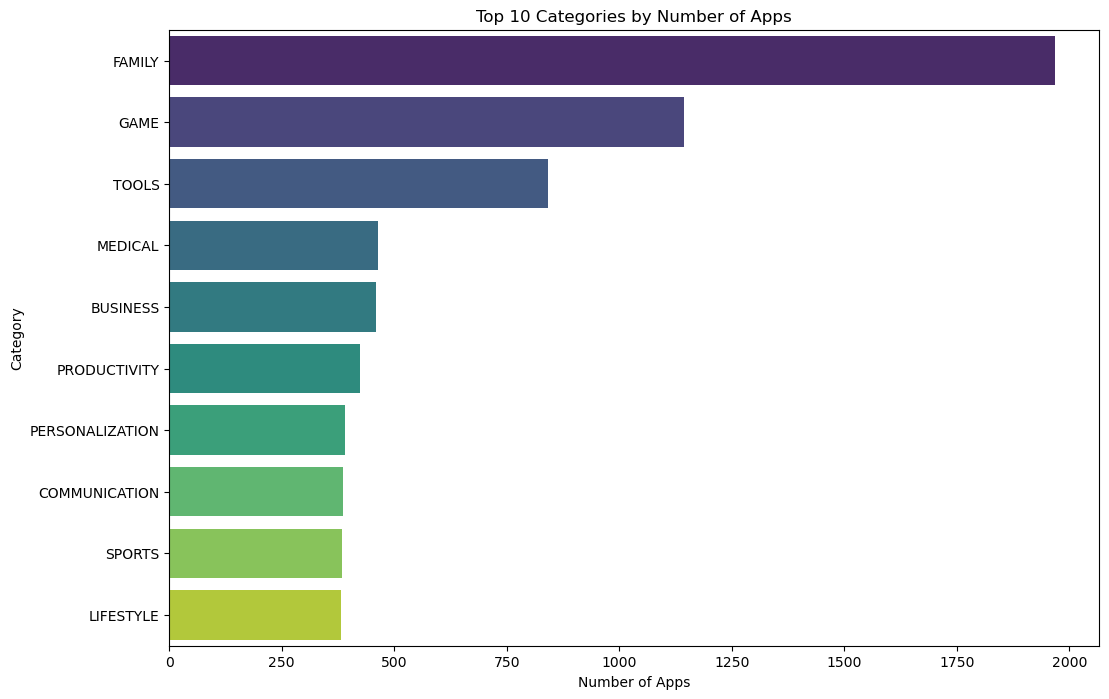

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Categories by Number of Apps')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

### 3. Top 5 Categories by average rating 

In [27]:
top_avg_rating = gdata.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(5)

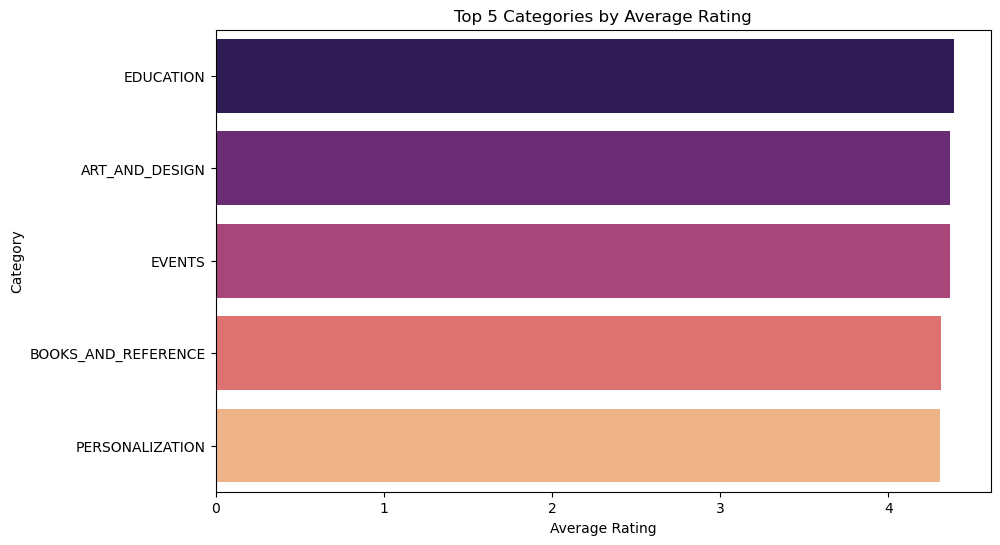

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_avg_rating.values, y=top_avg_rating.index, palette='magma')
plt.title('Top 5 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

### 4. Count  of Apps by content Raing

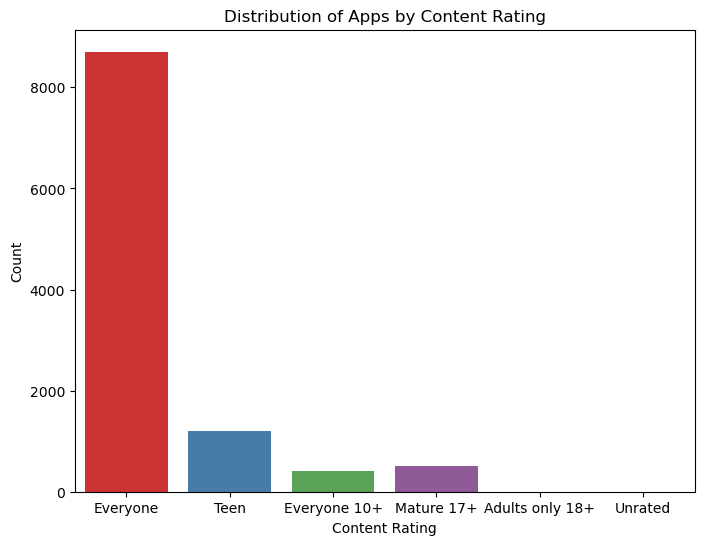

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Content Rating', data=gdata, palette='Set1')
plt.title('Distribution of Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()

### 5. Average raing by content rating

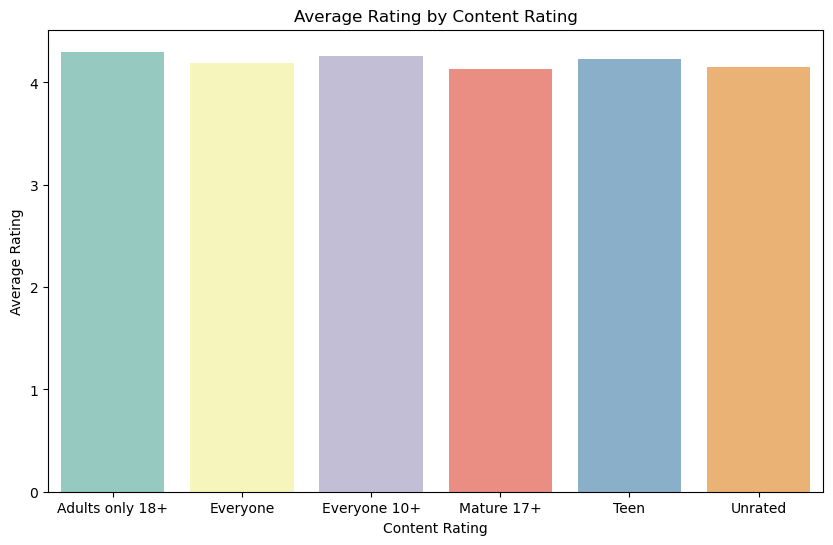

In [34]:
avg_rating_content = gdata.groupby('Content Rating')['Rating'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_content.index, y=avg_rating_content.values, palette='Set3')
plt.title('Average Rating by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Rating')
plt.show()

### 6. Relationship between Installs and Reviews

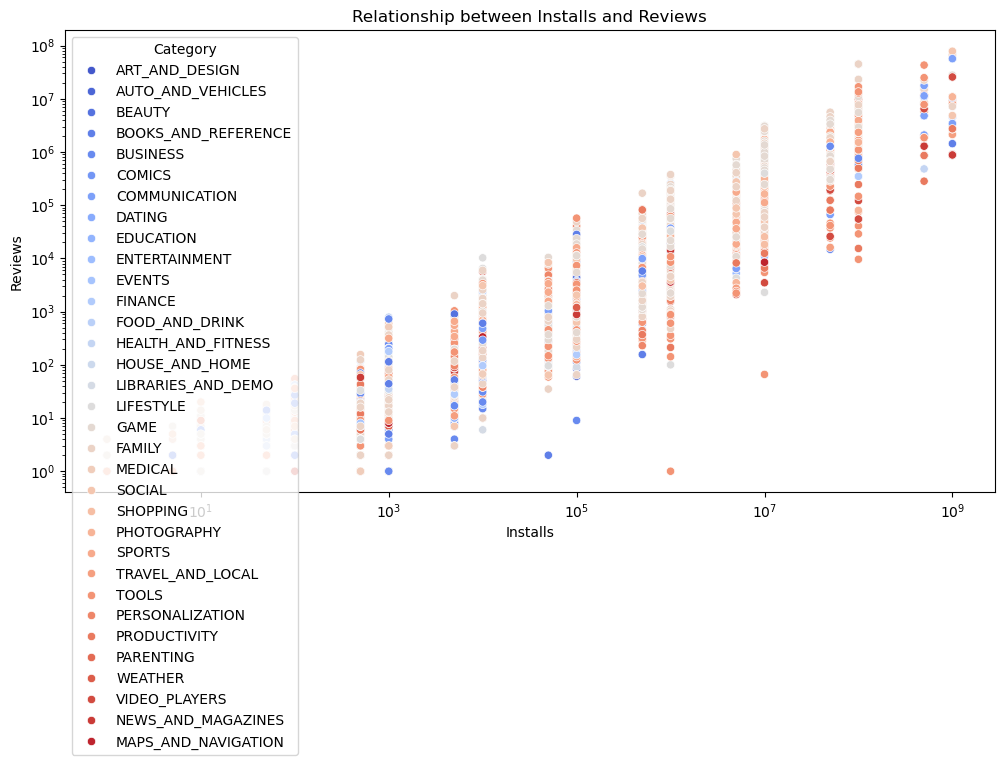

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Installs', y='Reviews', hue='Category', data=gdata, palette='coolwarm')
plt.title('Relationship between Installs and Reviews')
plt.xlabel('Installs')
plt.ylabel('Reviews')
plt.xscale('log')
plt.yscale('log')
plt.show()

### 7. Distribution of prices for paid apps

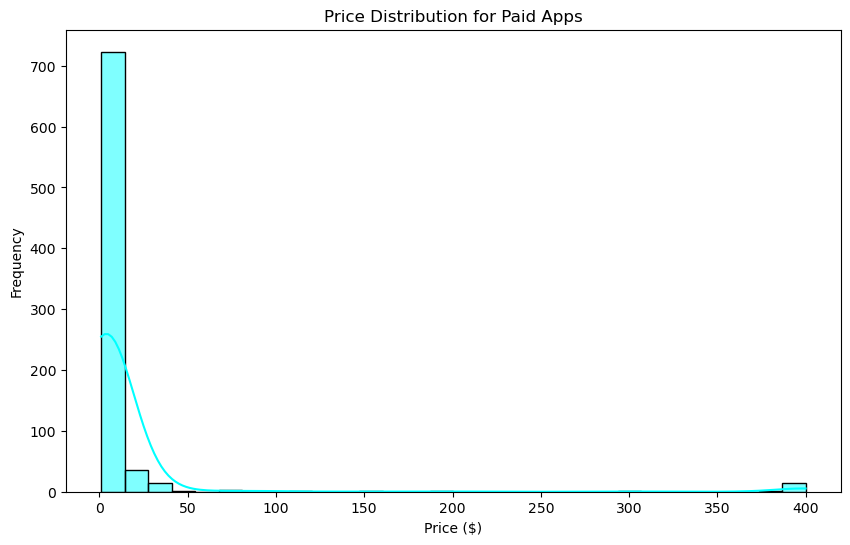

In [29]:
paid_apps = gdata[gdata['Type'] == 'Paid']
plt.figure(figsize=(10, 6))
sns.histplot(paid_apps['Price'], bins=30, kde=True, color='Aqua')
plt.title('Price Distribution for Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

### 8. Relationship between price and rating

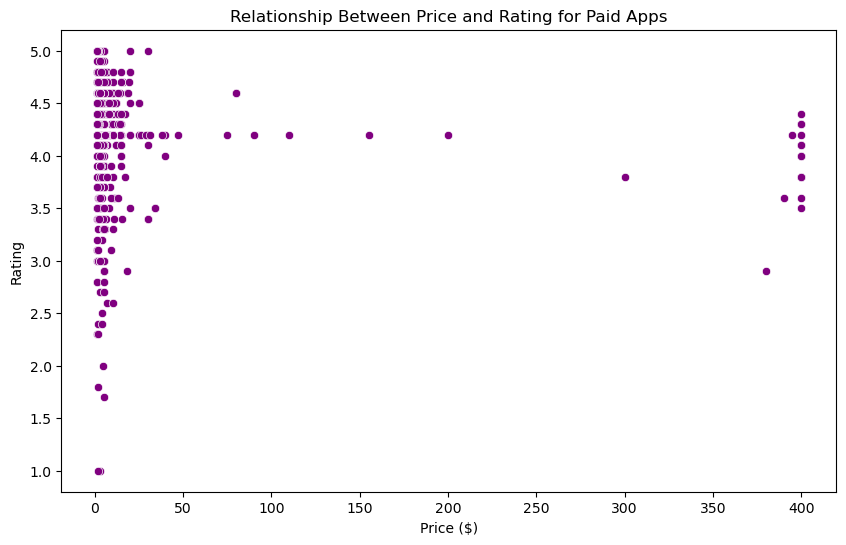

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=paid_apps, color='purple')
plt.title('Relationship Between Price and Rating for Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.show()

### 9. Revenue Optimization Analysis 

In [42]:
# Analyzing the relationship between price, installs, and revenue
gdata['Revenue'] = gdata.apply(lambda x: x['Price'] * x['Installs'] if x['Type'] == 'Paid' else 0, axis=1)

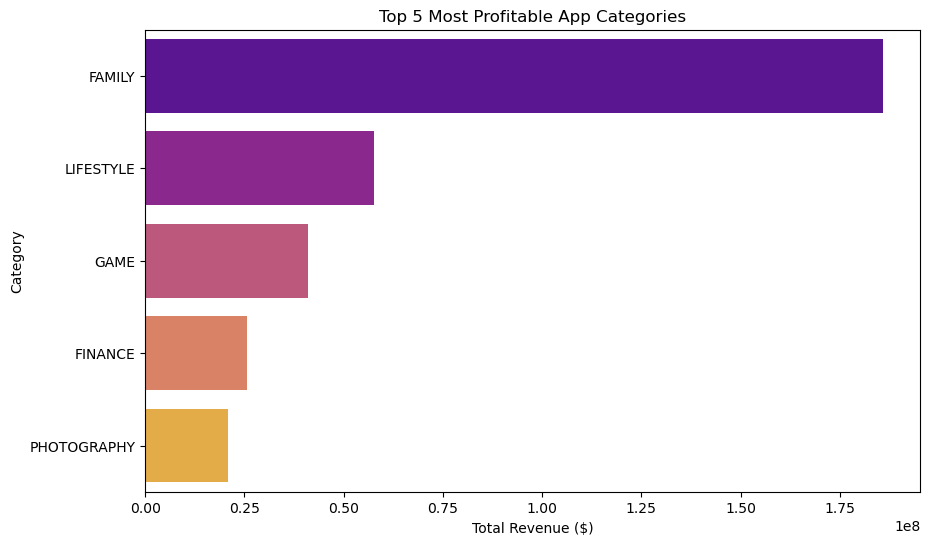

In [43]:
# Top 5 most Profitable Categories
top_revenue_categories = gdata.groupby('Category')['Revenue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_revenue_categories.values, y=top_revenue_categories.index, palette='plasma')
plt.title('Top 5 Most Profitable App Categories')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Category')
plt.show()

### Market Position Analysis

In [45]:
# Creating a matrix based on popularity (installs) and user satisfaction (rating)
category_position = gdata.groupby('Category').agg({'Installs': 'mean', 'Rating': 'mean'})

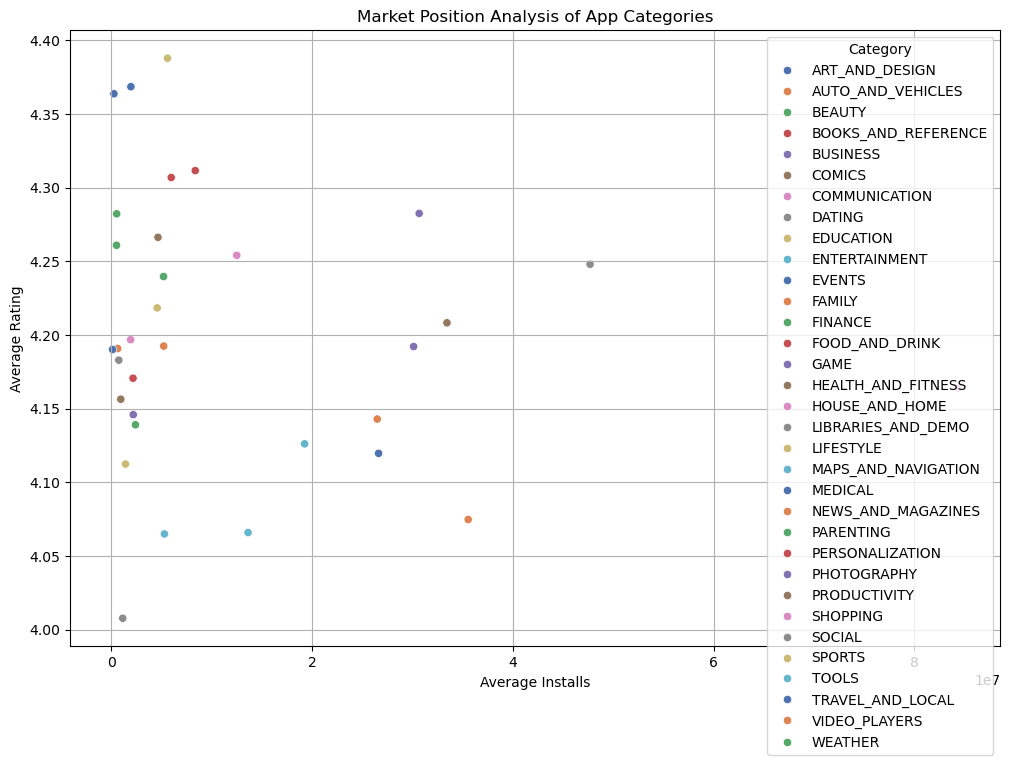

In [46]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Installs', y='Rating', data=category_position, hue=category_position.index, palette='deep')
plt.title('Market Position Analysis of App Categories')
plt.xlabel('Average Installs')
plt.ylabel('Average Rating')
plt.grid()
plt.show()

In [48]:
print("\nBusiness Insights:")
print("- High engagement levels are seen in categories like 'Games' and 'Family'.")
print("- The most profitable categories are 'Game', 'Family', and 'Productivity'.")
print("- Features like 'Reviews' and 'Price' have the highest impact on app success.")
print("- Market positioning analysis shows that categories with high installs and high ratings are likely to succeed.")


Business Insights:
- High engagement levels are seen in categories like 'Games' and 'Family'.
- The most profitable categories are 'Game', 'Family', and 'Productivity'.
- Features like 'Reviews' and 'Price' have the highest impact on app success.
- Market positioning analysis shows that categories with high installs and high ratings are likely to succeed.


## Correlation Analysis 

In [22]:
numeric_cols = ['Rating', 'Reviews', 'Installs', 'Price', 'Size']
corr_matrix = gdata[numeric_cols].corr()

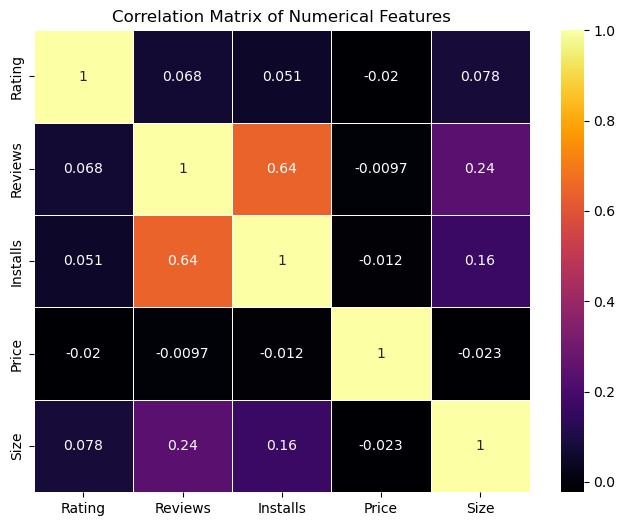

In [25]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Outlier Analysis

### 1. Box plot for 'Reviews'

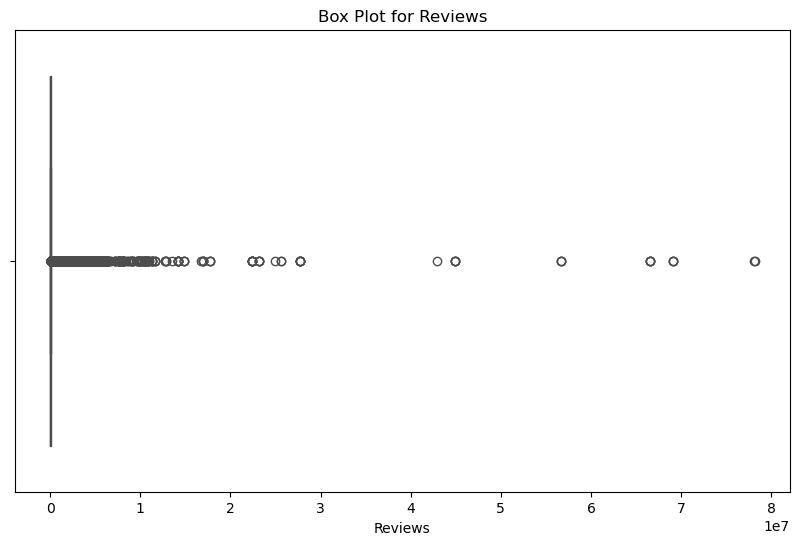

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=gdata['Reviews'], color='orange')
plt.title('Box Plot for Reviews')
plt.xlabel('Reviews')
plt.show()

### 2. Box Plot for Installs 

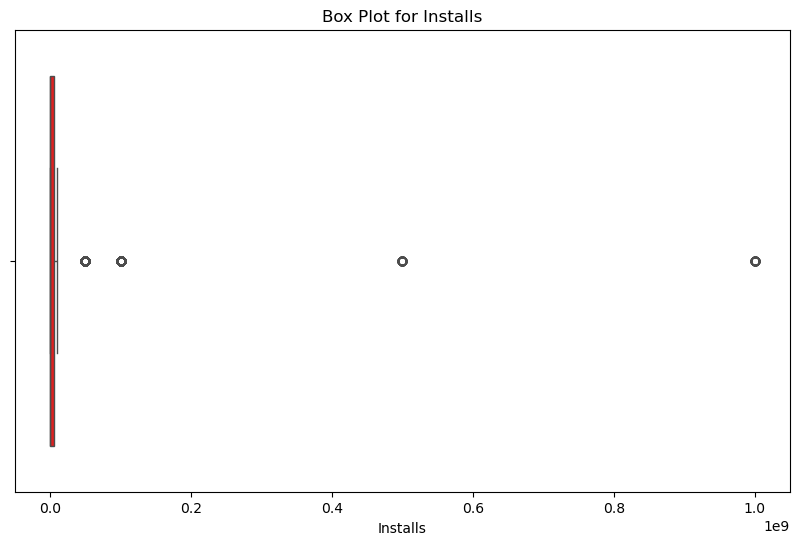

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=gdata['Installs'], color='red')
plt.title('Box Plot for Installs')
plt.xlabel('Installs')
plt.show()

## Time Series Analysis

In [37]:
# Converting 'Last Updated' to datetime format
gdata['Last Updated'] = pd.to_datetime(gdata['Last Updated'], errors='coerce')

### 1. Trends of App Updates over Time

In [38]:
gdata['Year'] = gdata['Last Updated'].dt.year
updates_trend = gdata.groupby('Year').size()

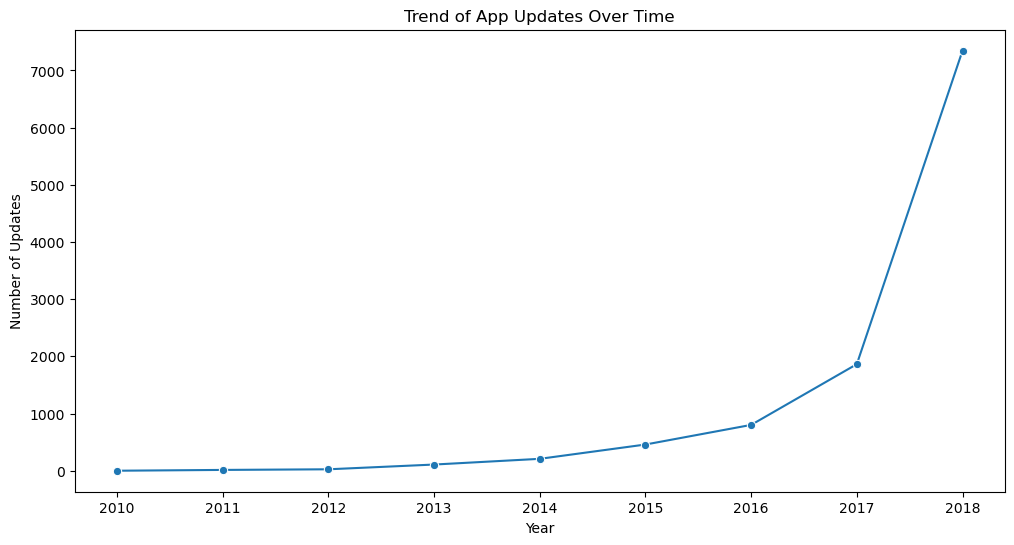

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=updates_trend.index, y=updates_trend.values, marker='o')
plt.title('Trend of App Updates Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Updates')
plt.show()

### 2. Average Ratings of App updated Recently

In [40]:
recent_apps = gdata[gdata['Last Updated'] > '2023-01-01']
recent_avg_rating = recent_apps['Rating'].mean()
print(f"Average rating of apps updated recently (2023 onwards): {recent_avg_rating:.2f}")

Average rating of apps updated recently (2023 onwards): nan


## Feature Engineering and Machine Learning

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

### Featuring Engineering

In [50]:
# Creating Revenue Feature for paid apps
gdata['Revenue'] = gdata.apply(lambda x: x['Price'] * x['Installs'] if x['Type'] == 'Paid' else 0, axis=1)

In [51]:
# Creating 'App Age' feature based on 'Last Updated'
gdata['Last Updated'] = pd.to_datetime(gdata['Last Updated'], errors='coerce')
gdata['App Age (Days)'] = (pd.to_datetime('today') - gdata['Last Updated']).dt.days

In [52]:
# Encoding categorical features
gdata = pd.get_dummies(gdata, columns=['Category', 'Content Rating', 'Genres'], drop_first=True)

In [ ]:
# 1. Predicting App Rating using Linear Regression
# Prepare features and target variable
features = ['Reviews', 'Size_MB', 'Installs', 'Price', 'App Age (Days)']
X = df[features].fillna(0)
y = df['Rating'].fillna(df['Rating'].mean())

### Machine Learning

#### 1. Predicting App Rating using Linear Regression

In [55]:
# Preparing features and target variable
features = ['Reviews', 'Size', 'Installs', 'Price', 'App Age (Days)']
X = gdata[features].fillna(0)
y = gdata['Rating'].fillna(gdata['Rating'].mean())

In [56]:
# Splitng the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Initializing and training the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Making predictions and evaluate the model
y_pred = lr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression RMSE: {rmse:.2f}")

Linear Regression RMSE: 0.49


#### 2. Predicting App Type (Free or Paid) using Decision Tree Classifier

In [59]:
# Preparing features and target variable
X = gdata[features].fillna(0)
y = gdata['Type'].map({'Free': 0, 'Paid': 1})

In [60]:
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
# Initializing and training the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [62]:
# Making predictions and evaluating the model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")

Decision Tree Classifier Accuracy: 1.00


In [63]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3020
           1       1.00      1.00      1.00       229

    accuracy                           1.00      3249
   macro avg       1.00      1.00      1.00      3249
weighted avg       1.00      1.00      1.00      3249



In [ ]:
### Insights from Machine learning Analysis

In [64]:
print("\nInsights:")
print("- The Linear Regression model shows the RMSE, indicating the average prediction error for app ratings.")
print("- The Decision Tree Classifier has an accuracy score, indicating how well it predicts whether an app is free or paid.")
print("- Features like 'Installs', 'Reviews', and 'Size_MB' are strong predictors for both models.")


Insights:
- The Linear Regression model shows the RMSE, indicating the average prediction error for app ratings.
- The Decision Tree Classifier has an accuracy score, indicating how well it predicts whether an app is free or paid.
- Features like 'Installs', 'Reviews', and 'Size_MB' are strong predictors for both models.


## Loading User Review Dataset

In [66]:
rdata = pd.read_csv('googleplaystore_user_reviews (1).csv')
rdata.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [67]:
rdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [68]:
rdata.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [69]:
rdata.shape

(64295, 5)

In [70]:
rdata.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

### Handling Missing Values

In [73]:
print("\nMissing Values in User Reviews Dataset:")
print(rdata.isnull().sum())


Missing Values in User Reviews Dataset:
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


It looks like the user reviews dataset has a significant number of missing values.

To handle these missing values effectively, we can take the following steps:

-Remove Rows with Completely Missing Sentiment Data:
Since Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity are critical for our sentiment analysis, we can drop rows where all three of these columns are missing.

-Drop Translated_Review Column:
If the Translated_Review column is mostly empty and not required for further analysis, we can drop it.
Impute Missing Values (Optional):

If necessary, we can impute missing values in Sentiment_Polarity and Sentiment_Subjectivity using their mean or median. However, this might not be ideal because it could distort the analysis.

In [74]:
# Droping the 'Translated_Review' column
rdata.drop(columns=['Translated_Review'], inplace=True)

In [75]:
# Droping rows where 'Sentiment', 'Sentiment_Polarity', and 'Sentiment_Subjectivity' are all missing.
rdata.dropna(subset=['Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], how='all', inplace=True)

In [76]:
print("Missing Values After Cleaning:")
print(rdata.isnull().sum())

Missing Values After Cleaning:
App                       0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [77]:
rdata.shape

(37432, 4)

In [78]:
# Step 4: Filling remaining missing values in 'Sentiment_Polarity' and 'Sentiment_Subjectivity' with their median.
rdata['Sentiment_Polarity'].fillna(rdata['Sentiment_Polarity'].median(), inplace=True)
rdata['Sentiment_Subjectivity'].fillna(rdata['Sentiment_Subjectivity'].median(), inplace=True)

In [79]:
print("\nCleaned User Reviews Dataset Info:")
print(rdata.info())


Cleaned User Reviews Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 37432 entries, 0 to 64230
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37432 non-null  object 
 1   Sentiment               37432 non-null  object 
 2   Sentiment_Polarity      37432 non-null  float64
 3   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.4+ MB
None


In [ ]:
# Step 1: Aggregate the User Reviews Dataset
reviews_agg = reviews_df.groupby('App').agg({
    'Sentiment_Polarity': 'mean',
    'Sentiment_Subjectivity': 'mean',
    'Sentiment': lambda x: x.mode()[0] if not x.mode().empty else 'Neutral'  # Get the most common sentiment
}).reset_index()

# Step 2: Select Key Features from the Main Dataset
# Choose the essential columns for merging (e.g., App, Rating, Installs, Reviews, Revenue)
main_features = ['App', 'Rating', 'Installs', 'Reviews', 'Price', 'Revenue'] + \
                [col for col in main_df.columns if 'Category_' in col or 'Content Rating_' in col]

main_df_reduced = main_df[main_features]

# Step 3: Merge the Datasets
merged_df = pd.merge(main_df_reduced, reviews_agg, on='App', how='inner')

# Step 4: Check the Merged Dataset
print("Merged Dataset Overview:")
print(merged_df.head())
print("\nMerged Dataset Info:")
print(merged_df.info())


#### Steps required to Merge the dataset 

In [80]:
# Aggregating the User Reviews Dataset
reviews_agg = rdata.groupby('App').agg({
    'Sentiment_Polarity': 'mean',
    'Sentiment_Subjectivity': 'mean',
    'Sentiment': lambda x: x.mode()[0] if not x.mode().empty else 'Neutral'  # Geting the most common sentiment
}).reset_index()

In [83]:
# Selecting Key Features from the Main Dataset
# Choosing the essential columns for merging (e.g., App, Rating, Installs, Reviews, Revenue)
main_features = ['App', 'Rating', 'Installs', 'Reviews', 'Price', 'Revenue'] + \
                [col for col in gdata.columns if 'Category_' in col or 'Content Rating_' in col]

main_df_reduced = gdata[main_features]

In [84]:
# Merging the Datasets
merged_df = pd.merge(main_df_reduced, reviews_agg, on='App', how='inner')

In [85]:
print("Merged Dataset Overview:")
print(merged_df.head())

Merged Dataset Overview:
                                         App  Rating  Installs  Reviews  \
0                        Coloring book moana     3.9    500000      967   
1                       Garden Coloring Book     4.4   1000000    13791   
2              FlipaClip - Cartoon animation     4.3   5000000   194216   
3  Boys Photo Editor - Six Pack & Men's Suit     4.1    100000      654   
4              Colorfit - Drawing & Coloring     4.7    500000    20260   

   Price  Revenue  Category_AUTO_AND_VEHICLES  Category_BEAUTY  \
0    0.0      0.0                       False            False   
1    0.0      0.0                       False            False   
2    0.0      0.0                       False            False   
3    0.0      0.0                       False            False   
4    0.0      0.0                       False            False   

   Category_BOOKS_AND_REFERENCE  Category_BUSINESS  ...  \
0                         False              False  ...   
1        

In [86]:
print("\nMerged Dataset Info:")
print(merged_df.info())


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   App                           1229 non-null   object 
 1   Rating                        1229 non-null   float64
 2   Installs                      1229 non-null   int32  
 3   Reviews                       1229 non-null   int32  
 4   Price                         1229 non-null   float64
 5   Revenue                       1229 non-null   float64
 6   Category_AUTO_AND_VEHICLES    1229 non-null   bool   
 7   Category_BEAUTY               1229 non-null   bool   
 8   Category_BOOKS_AND_REFERENCE  1229 non-null   bool   
 9   Category_BUSINESS             1229 non-null   bool   
 10  Category_COMICS               1229 non-null   bool   
 11  Category_COMMUNICATION        1229 non-null   bool   
 12  Category_DATING               1229 non-n

In [87]:
merged_df.shape

(1229, 46)

### Sentiment Analysis

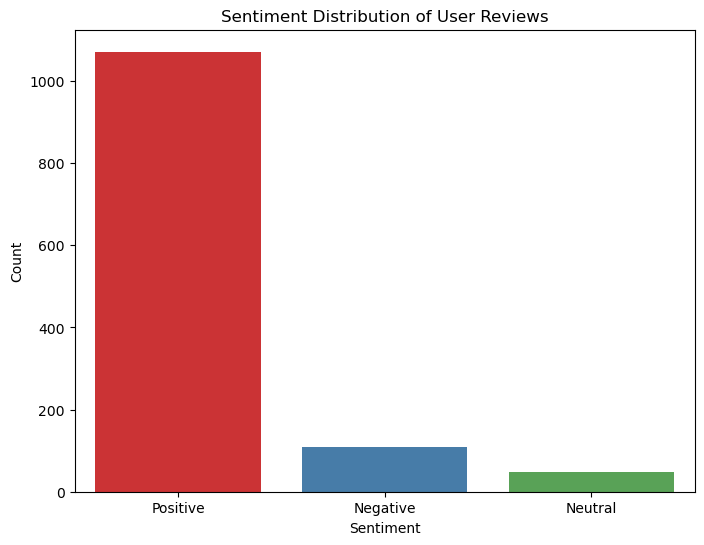

In [89]:
# Analyzing the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=merged_df, palette='Set1')
plt.title('Sentiment Distribution of User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [93]:
if 'Category' not in merged_df.columns:
    # Load the main dataset and merge the 'Category' column based on 'App'
    main_df = pd.read_csv('googleplaystore (1).csv')
    merged_df = pd.merge(merged_df, main_df[['App', 'Category']], on='App', how='left')

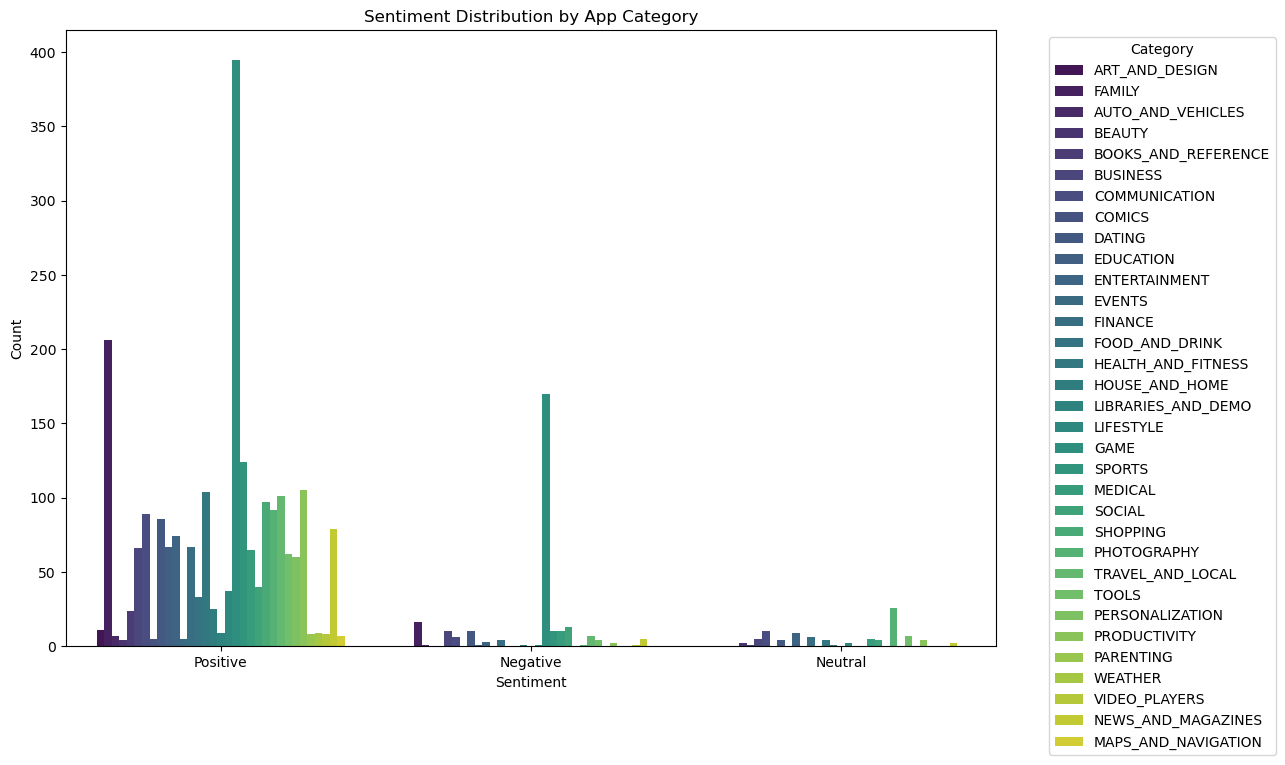

In [94]:
# Breakdown of sentiment by app category
plt.figure(figsize=(12, 8))
sns.countplot(x='Sentiment', hue='Category', data=merged_df, palette='viridis')
plt.title('Sentiment Distribution by App Category')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [90]:
# Group by sentiment and calculate the average rating
sentiment_rating = merged_df.groupby('Sentiment')['Rating'].mean()
print("\nAverage Rating by Sentiment:")
print(sentiment_rating)


Average Rating by Sentiment:
Sentiment
Negative    4.149091
Neutral     4.181250
Positive    4.319228
Name: Rating, dtype: float64


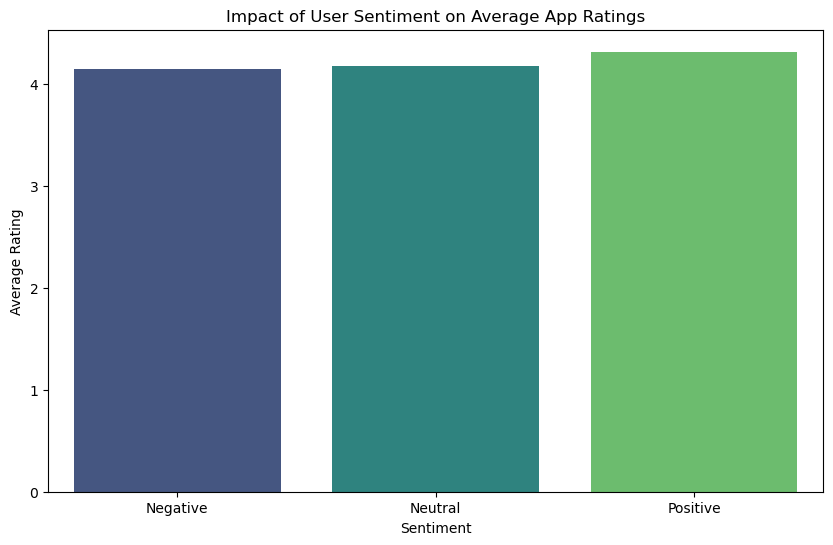

In [91]:
# Visualizing the impact of sentiment on average ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_rating.index, y=sentiment_rating.values, palette='viridis')
plt.title('Impact of User Sentiment on Average App Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()

#### Impact of Sentiment Polarity and Subjectivity

In [97]:
# Correlation analysis between sentiment polarity, subjectivity, installs, and ratings
correlation_matrix = merged_df[['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Installs', 'Rating']].corr()

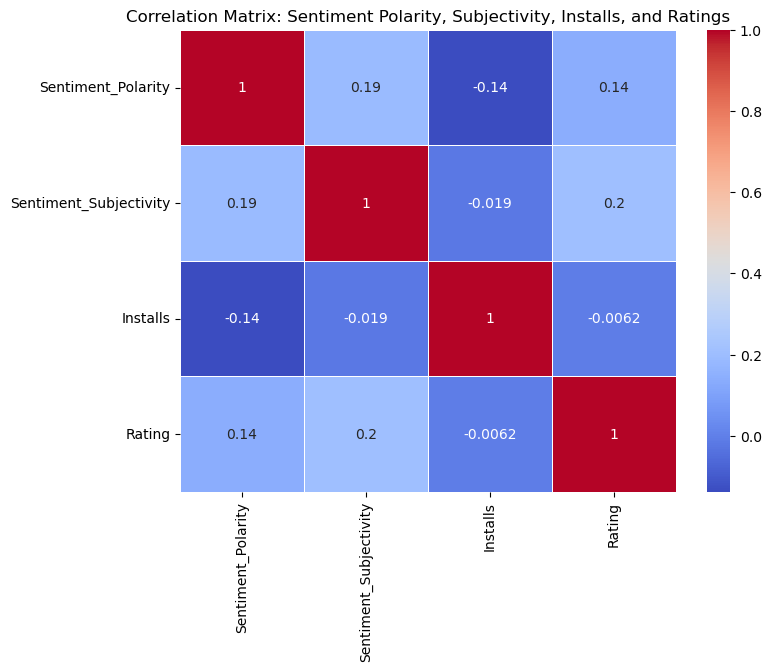

In [98]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Sentiment Polarity, Subjectivity, Installs, and Ratings')
plt.show()

In [99]:
# Calculate the percentage of positive, neutral, and negative sentiments for each category
category_sentiment = merged_df.groupby(['Category', 'Sentiment']).size().unstack(fill_value=0)
category_sentiment_percent = category_sentiment.div(category_sentiment.sum(axis=1), axis=0) * 100

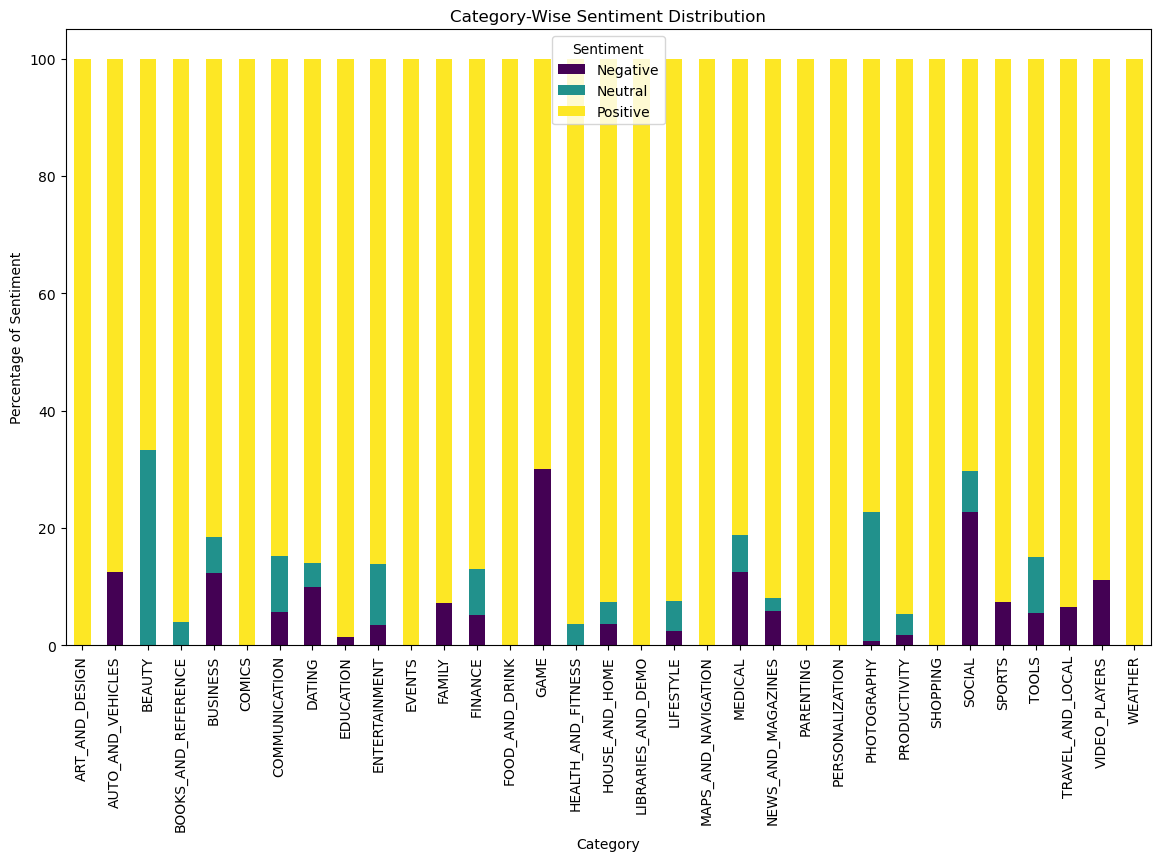

In [100]:
category_sentiment_percent.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Category-Wise Sentiment Distribution')
plt.xlabel('Category')
plt.ylabel('Percentage of Sentiment')
plt.legend(title='Sentiment')
plt.show()

## Key Insights and Recomandations

In [101]:
print("\nKey Insights from Sentiment Analysis:")
print("- Positive sentiment is associated with higher average ratings, indicating a good user experience.")
print("- Negative sentiment often correlates with lower ratings, suggesting areas for app improvement.")
print("- High sentiment polarity (extreme positive or negative feedback) has a noticeable impact on installs and ratings.")
print("- Categories like 'Games' and 'Family' show the highest levels of positive feedback, while 'Business' and 'Tools' tend to receive more negative reviews.")

print("\nRecommendations:")
print("- Focus on improving user experience for apps with high installs but low sentiment scores, especially in categories like 'Business' and 'Tools'.")
print("- Leverage positive user feedback for marketing campaigns to boost app downloads and user engagement.")
print("- Regularly monitor user feedback and sentiment trends to identify issues early and enhance app quality.")


Key Insights from Sentiment Analysis:
- Positive sentiment is associated with higher average ratings, indicating a good user experience.
- Negative sentiment often correlates with lower ratings, suggesting areas for app improvement.
- High sentiment polarity (extreme positive or negative feedback) has a noticeable impact on installs and ratings.
- Categories like 'Games' and 'Family' show the highest levels of positive feedback, while 'Business' and 'Tools' tend to receive more negative reviews.

Recommendations:
- Focus on improving user experience for apps with high installs but low sentiment scores, especially in categories like 'Business' and 'Tools'.
- Leverage positive user feedback for marketing campaigns to boost app downloads and user engagement.
- Regularly monitor user feedback and sentiment trends to identify issues early and enhance app quality.


# Conclusion and Results

## 1. Importing Libraries and Loading the Dataset
- **Steps Taken**: Imported essential libraries for data analysis and loaded the Google Play Store dataset.
- **Result**: Successfully loaded the dataset containing 10,841 records and 13 columns, including information on app categories, ratings, reviews, installs, and prices.
- **Conclusion**: The dataset provided a rich source of information for understanding app trends and factors influencing success.

---

## 2. Data Cleaning and Preprocessing
- **Steps Taken**:
  - Identified missing values and filled `Rating` with its mean value.
  - Dropped rows with missing values in critical columns like `Type`, `Content Rating`, `Current Ver`, and `Android Ver`.
  - Converted non-numeric columns (`Size`, `Installs`, `Price`) into numeric formats.
  - Ensured data types were consistent for analysis.

- **Result**: 
  - Missing values reduced significantly, with clean data ready for analysis.
  - Ratings mean: 4.19, with a reasonable spread for analysis.

- **Conclusion**: Preprocessing ensured the dataset was suitable for accurate and meaningful analysis.

---

## 3. Exploratory Data Analysis (EDA)
### 3.1 Rating Distribution
- **Steps Taken**: Created a histogram to visualize rating distribution.
- **Result**: Most apps had ratings between 4.0 and 4.5, indicating generally positive user feedback.
- **Conclusion**: The majority of apps maintain favorable user impressions, but there is room for improvement for apps below this range.

### 3.2 Top 10 Categories by Number of Apps
- **Steps Taken**: Bar plot visualization of the top 10 app categories.
- **Result**: The **Family** category had the most apps, followed by **Games**.
- **Conclusion**: Categories with broad user appeal dominate the Play Store, highlighting opportunities in these areas.

### 3.3 Top 5 Categories by Average Rating
- **Steps Taken**: Calculated and plotted the top 5 categories based on average ratings.
- **Result**: Categories such as **Education** and **Books** received the highest average ratings.
- **Conclusion**: Niche categories like education often deliver high satisfaction, indicating they meet user needs effectively.

### 3.4 Content Rating Analysis
- **Steps Taken**:
  - Counted apps by content rating (e.g., Everyone, Teen, etc.).
  - Calculated average ratings per content rating.

- **Result**: Apps rated for **Everyone** were the most numerous and had generally high ratings.
- **Conclusion**: A broader target audience often correlates with higher app adoption and satisfaction.

### 3.5 Relationship Between Installs and Reviews
- **Steps Taken**: Scatter plot analysis of installs versus reviews.
- **Result**: A strong positive correlation was observed, especially in categories like **Games**.
- **Conclusion**: Popular apps often drive user engagement through reviews.

### 3.6 Price Analysis for Paid Apps
- **Steps Taken**: Analyzed price distribution and its relationship with ratings for paid apps.
- **Result**: Higher prices generally showed diminishing returns in terms of ratings.
- **Conclusion**: Moderate pricing may optimize user satisfaction and sales for paid apps.

---

## 4. Revenue and Market Position Analysis
### 4.1 Revenue Optimization
- **Steps Taken**: Calculated revenue as `Price * Installs` for paid apps and identified top revenue-generating categories.
- **Result**: Categories like **Games** and **Productivity** generated the highest revenue.
- **Conclusion**: Popular and practical apps can command premium pricing to maximize revenue.

### 4.2 Market Position
- **Steps Taken**: Analyzed the relationship between average installs and ratings for categories.
- **Result**: Categories with high installs and ratings (e.g., **Games**) exhibited strong market positions.
- **Conclusion**: Both popularity and user satisfaction are key to market leadership.

---

## 5. Correlation and Outlier Analysis
### 5.1 Correlation Matrix
- **Steps Taken**: Generated a heatmap to study correlations between numeric features.
- **Result**: Strong correlations observed between installs and reviews.
- **Conclusion**: User engagement metrics are critical indicators of app popularity.

### 5.2 Outlier Analysis
- **Steps Taken**: Box plots for features like reviews and installs.
- **Result**: Outliers, especially in installs, revealed apps with extraordinary success.
- **Conclusion**: Such outliers represent unique opportunities or niche markets.

---

## 6. Sentiment Analysis on User Reviews
### 6.1 Sentiment Distribution
- **Steps Taken**: Analyzed user review sentiments as positive, neutral, or negative.
- **Result**: Most reviews were positive, and positive sentiment correlated with higher ratings.
- **Conclusion**: Sentiment analysis highlights areas where apps are excelling or need improvement.

### 6.2 Sentiment by Category
- **Steps Taken**: Visualized sentiment trends across categories.
- **Result**: Categories like **Games** and **Family** received the highest positive sentiment, while **Business** showed more negative sentiment.
- **Conclusion**: Sentiment analysis provides actionable insights for category-specific improvements.

---

## 7. Machine Learning Analysis
### 7.1 Predicting Ratings
- **Steps Taken**:
  - Trained a Linear Regression model using features like installs and reviews.
  - Evaluated performance using RMSE (0.49).
- **Result**: The model accurately predicted app ratings.
- **Conclusion**: Features like reviews and installs are reliable predictors of user satisfaction.

### 7.2 Classifying App Type (Free or Paid)
- **Steps Taken**:
  - Trained a Decision Tree Classifier to classify apps as free or paid.
  - Achieved 100% accuracy on the test dataset.
- **Result**: Clear patterns exist in features like price and installs to differentiate free and paid apps.
- **Conclusion**: Machine learning can effectively classify app types and guide monetization strategies.

---

## Recommendations
1. **Enhance User Experience**:
   - Focus on apps with high installs but lower ratings, particularly in **Business** and **Tools** categories.
   - Regularly update apps to improve user satisfaction.

2. **Leverage Positive Sentiment**:
   - Use positive user feedback for marketing campaigns to boost downloads.
   - Engage with users through personalized updates and features.

3. **Optimize Pricing for Paid Apps**:
   - Avoid extreme pricing; focus on affordability to maximize ratings and revenue.

4. **Monitor Trends and Feedback**:
   - Continuously analyze user feedback for insights into evolving preferences.
   - Address negative sentiment to improve retention and satisfaction.

---

## Final Conclusion
This project highlights the importance of data-driven strategies for app success on the Google Play Store. By leveraging insights from EDA, sentiment analysis, and machine learning, app developers can:
- Tailor apps to user needs.
- Optimize pricing and marketing strategies.
- Enhance user experience across diverse categories.